## Ejemplo de red convolucinal con keras y mnist

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17202833507552700682
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17277125801636272548
physical_device_desc: "device: XLA_CPU device"
]


In [16]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 2)           502       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 2)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 1,092
Trainable params: 1,092
Non-trainable params: 0
____________________________________________________

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 12s 1us/step
(60000, 28, 28)


In [ ]:
batch_size = 50
epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history=model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,validation_data=(test_images, test_labels),
          verbose=1
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 231us/step - loss: 0.1946 - accuracy: 0.9408 - val_loss: 0.1750 - val_accuracy: 0.9443
Epoch 2/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.1823 - accuracy: 0.9446 - val_loss: 0.1654 - val_accuracy: 0.9495
Epoch 3/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.1724 - accuracy: 0.9473 - val_loss: 0.1603 - val_accuracy: 0.9508
Epoch 4/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.1635 - accuracy: 0.9501 - val_loss: 0.1497 - val_accuracy: 0.9532
Epoch 5/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.1556 - accuracy: 0.9524 - val_loss: 0.1476 - val_accuracy: 0.9554
Epoch 6/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.1487 - accuracy: 0.9546 - val_loss: 0.1388 - val_accuracy: 0.9566
Epoch 7/10
60000/60000 [==============================] 

Evaluación modelo

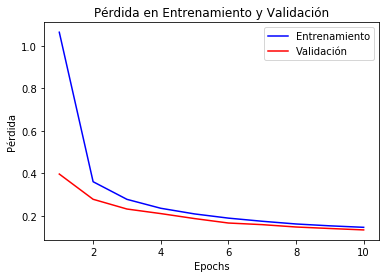

In [11]:
import matplotlib.pyplot as plt
ent_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(ent_loss) + 1)

plt.plot(epochs, ent_loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

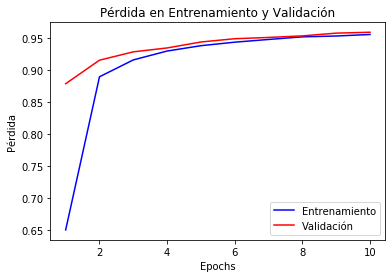

In [13]:
import matplotlib.pyplot as plt

ent_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(ent_loss) + 1)

plt.plot(epochs, ent_loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()